# Loop Workflow Example 2

> * High level approach to making a 3D model from just a bounding box you can draw
> * To run this notebook for the first time, there are some dependencies needed to use the interactive map. Execute the cell immediately below and restart jupyter.

In [1]:
!conda install -c conda-forge folium ipyleaflet ipywidgets -y 
!jupyter nbextension enable --py --sys-prefix ipyleaflet

Solving environment: ...working... done

# All requested packages already installed.



Enabling notebook extension jupyter-leaflet/extension...
      - Validating: ok


## Leaflet Maps

In [1]:
import ipywidgets as widgets
import os
import matplotlib.pyplot as plt

# load last saved map area and mdoe engine (if they exist)
if(not os.path.isdir('../scratch/')):
    os.mkdir('../scratch/')
if(os.path.isfile('../scratch/last_choices.txt')):
    f=open('../scratch/last_choices.txt','r')
    contents =f.readlines()
    f.close()
    default_map=contents[0].replace("\n","")
    default_engine=contents[1].replace("\n","")
else:
    default_map='Turner_Syncline'
    default_engine='loopstructural'

options=['Draw Your Own','Last Area Drawn']

if(not default_map in options):
    default_map= options[0]

map_choice=widgets.Dropdown(
    options=options,
    value=default_map,
    description='Map area:',
    disabled=False,
)
display(map_choice)

Dropdown(description='Map area:', options=('Draw Your Own', 'Last Area Drawn'), value='Draw Your Own')

In [2]:
test_data_name=map_choice.value
print(test_data_name)

Draw Your Own


In [3]:
import folium
import pandas as pd
import json
import random
from shapely.geometry import Polygon
from ipyleaflet import Map, basemaps, GeoJSON, LayersControl, DrawControl,WMSLayer, GeoData
from ipywidgets import Label
from ipywidgets import Label
import ipywidgets as widgets
import geopandas as gpd

if(not test_data_name =='Draw Your Own'):
    if(test_data_name=='Last Area Drawn'):
        last_coords=pd.read_csv('../scratch/last_area.csv')
        display(last_coords)
        minx=last_coords.iloc[0]['minx']
        miny=last_coords.iloc[0]['miny']
        maxx=last_coords.iloc[0]['maxx']
        maxy=last_coords.iloc[0]['maxy']
    elif(not test_data_name =='Draw Your Own'):
        y_point_list = [miny, miny, maxy, maxy, maxy]
        x_point_list = [minx, maxx, maxx, minx, minx]
        bbox_geom = Polygon(zip(x_point_list, y_point_list))
        polygon = gpd.GeoDataFrame(index=[0], crs=dst_crs, geometry=[bbox_geom])
        polygon_ll=polygon.to_crs(src_crs)

        minx=polygon_ll.total_bounds[0]
        maxx=polygon_ll.total_bounds[2]
        miny=polygon_ll.total_bounds[1]
        maxy=polygon_ll.total_bounds[3]

        minlong=minx
        maxlong=maxx
        minlat=miny
        maxlat=maxy
        #print("x",polygon_ll.total_bounds[0])
        st_bbox=[minlong,minlat,maxlong,maxlat]
        lat_point_list = [minlat, minlat, maxlat, maxlat,maxlat]
        lon_point_list = [minlong, maxlong, maxlong, minlong, minlong]
        bbox_geom = Polygon(zip(lon_point_list, lat_point_list))
        rect = gpd.GeoDataFrame(index=[0], crs=src_crs, geometry=[bbox_geom]) 

    
    src_crs = "epsg:4326"  # coordinate reference system for imported dtms (geodetic lat/long WGS84)
    dst_crs = "epsg:28350"  # coordinate reference system for imported dtms (geodetic lat/long WGS84)

    bbox2=str(minx)+","+str(miny)+","+str(maxx)+","+str(maxy)
    y_point_list = [miny, miny, maxy, maxy, maxy]
    x_point_list = [minx, maxx, maxx, minx, minx]
    bbox_geom = Polygon(zip(x_point_list, y_point_list))
    polygon = gpd.GeoDataFrame(index=[0], crs=dst_crs, geometry=[bbox_geom])
    polygon_ll=polygon.to_crs(src_crs)

    minlong=polygon_ll.total_bounds[0]
    maxlong=polygon_ll.total_bounds[2]
    minlat=polygon_ll.total_bounds[1]
    maxlat=polygon_ll.total_bounds[3]
    
    minlong=minx
    maxlong=maxx
    minlat=miny
    maxlat=maxy

    lat_point_list = [minlat, minlat, maxlat, maxlat,maxlat]
    lon_point_list = [minlong, maxlong, maxlong, minlong, minlong]
    bbox_geom = Polygon(zip(lon_point_list, lat_point_list))
    rect = gpd.GeoDataFrame(index=[0], crs=src_crs, geometry=[bbox_geom]) 

    example_rect = GeoData(geo_dataframe = rect,
                   style={'color': 'purple', 'opacity':3, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6},                  
                   name = 'Example')
    center=(minlat+((maxlat-minlat)/2),minlong+((maxlong-minlong)/2))
else:
    center=(-22.6,117.3)
    
wms_warox = WMSLayer(
    url='https://geo.loop-gis.org/geoserver/loop/wms?',
    layers='loop:waroxi_wa_4326_bed',
    format='image/png',
    transparent=True,
    attribution='Outcrop data from GSWA',
    name='outcrops'

)
wms_geol = WMSLayer(
    url='https://geo.loop-gis.org/geoserver/loop/wms?',
    layers='loop:2_5m_interpgeop15_4326',
    format='image/png',
    transparent=True,
    opacity=0.4,
    attribution='Geology data from GSWA',
    name='geology'

)
m =Map(basemap=basemaps.OpenTopoMap, center=center, zoom=8,scroll_wheel_zoom=True)
label = Label()
display(label)

def handle_interaction(**kwargs):
    if kwargs.get('type') == 'mousemove':
        label.value = str(kwargs.get('coordinates'))

m.on_interaction(handle_interaction)
m.add_layer(wms_geol)
m.add_layer(wms_warox)
if( not test_data_name =='Draw Your Own'):
    m.add_layer(example_rect)

    


m.add_control(LayersControl())
dc = DrawControl(rectangle={'shapeOptions': {'color': '#0000FF'}})
m.add_control(dc)
m

Label(value='')

Map(center=[-22.6, 117.3], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_o…

In [5]:
if(test_data_name=='Draw Your Own' or test_data_name=='Last Area Drawn'):
    if(test_data_name=='Draw Your Own'):
        new_poly=GeoJSON(data=dc.last_draw)
        new_poly=str(new_poly)

        if("'geometry': None" in new_poly):
            raise NameError('map2loop error: No rectangle selected')
        new_poly=new_poly.rsplit("'coordinates': ", 1)[1]
        new_poly=new_poly.replace('[[[','').replace('[','').replace(']]]}})','').replace('],','').replace(',','').split(" ")
        longs=new_poly[0::2]
        lats=new_poly[1::2]
        minlong=float(min(longs))
        maxlong=float(max(longs))
        minlat=float(max(lats)) #ignores sign
        maxlat=float(min(lats)) #ignores sign
        
    bounds=(minlong,maxlong,minlat,maxlat)
    src_crs = "epsg:4326"  # coordinate reference system for imported dtms (geodetic lat/long WGS84)
    dst_crs = "epsg:28350" # coordinate system for example data


    lat_point_list = [minlat, minlat, maxlat, maxlat,maxlat]
    lon_point_list = [minlong, maxlong, maxlong, minlong, minlong]
    bbox_geom = Polygon(zip(lon_point_list, lat_point_list))
    mbbox = gpd.GeoDataFrame(index=[0], crs=src_crs, geometry=[bbox_geom]) 
    bbox=mbbox.total_bounds
    st_bbox=[bbox[0],bbox[1],bbox[2],bbox[3]]
    print(src_crs,mbbox.total_bounds)
    mbbox=mbbox.to_crs(dst_crs)
    print(dst_crs,mbbox.total_bounds)
    
    f=open('../scratch/last_area.csv','w') 
    ostr='minx,miny,maxx,maxy\n'
    f.write(ostr)
    ostr=str(minlong)+','+str(minlat)+','+str(maxlong)+','+str(maxlat)+'\n'
    f.write(ostr)
    f.close()
    

epsg:4326 [117.919401 -22.876175 118.128176 -22.73439 ]
epsg:28350 [ 594310.18637584 7469744.56603117  615847.46138666 7485589.95016524]


In [6]:
import time
import warnings

t0 = time.time()
warnings.filterwarnings('ignore')

## Map2Loop


 orientations layer  metadata
--------------------
    bbox [ 595574.09555439 7469808.54393476  615419.21039717 7482191.84070806]
    CRS None
    # items 21
    Data types ['Point']

 geology layer  metadata
--------------------
    bbox [ 504687.35760576 7430805.86939398  646972.34891035 7532547.7895649 ]
    CRS None
    # items 13
    Data types ['MultiPolygon']

 fold layer  metadata
--------------------
    bbox [ 594310.18637584 7469744.56603117  615847.46138666 7480931.19338735]
    CRS None
    # items 9
    Data types ['LineString', 'MultiLineString']
map2loop warning: Fault_15531_0 is one of a set of duplicates, so renumbering
map2loop warning: Fault_15531_1 is one of a set of duplicates, so renumbering

 fault layer  metadata
--------------------
    bbox [ 594310.18637584 7469744.56603117  615847.46138666 7480931.19338735]
    CRS +init=epsg:28350 +type=crs
    # items 7
    Data types ['LineString']

 mindeps layer  metadata
--------------------
    bbox [ 604599.7955161

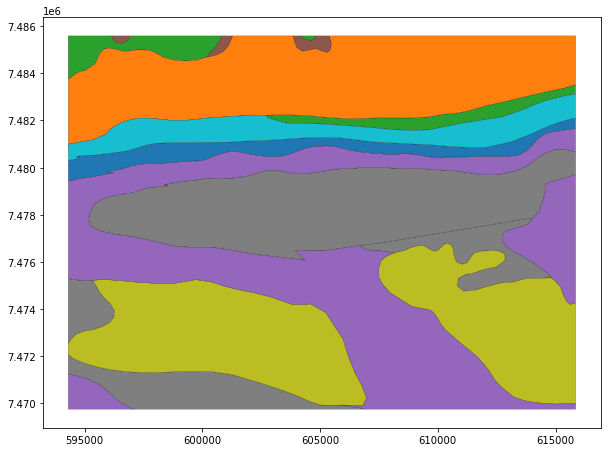

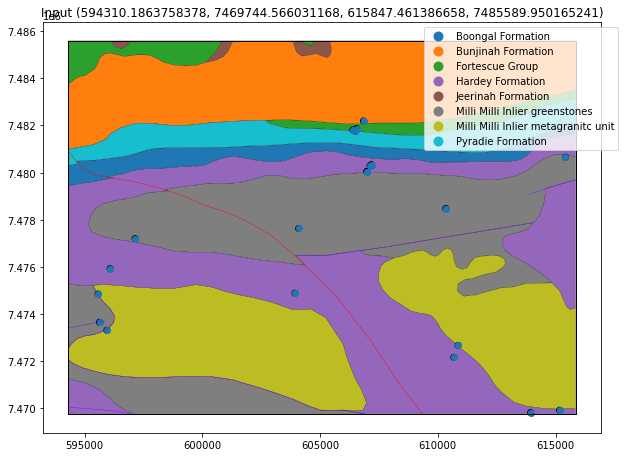

  0%|                            | 0/100 [00:00<?, ?it/s]

Generating topology analyser input...
13  polygons
Successful parameter load
Output directory created at: ./model-test/graph/
Topology analysis complete.

Resolving ambiguities using ASUD...	output_dir:./model-test/graph/
Done.
Generating topology graph display and unit groups...
0    'Fortescue Group', 'anchor': 'n', 'fontStyle': 'bold'
1    'Milli Milli Inlier greenstones', 'anchor': 'n', 'fontStyle': 'bold'
2    'Milli Milli Inlier metagranitc unit', 'anchor': 'n', 'fontStyle': 'bold'
3    'Boongal Formation'
4    'Bunjinah Formation'
5    'Fortescue Group'
6    'Hardey Formation'
7    'Jeerinah Formation'
8    'Milli Milli Inlier greenstones'
9    'Milli Milli Inlier metagranitc unit'
10    'Pyradie Formation'
Topology figure saved to ./model-test/tmp/topology-fig.png


 10%|█▉                 | 10/100 [00:01<00:11,  7.84it/s]

Done
Fetching DTM...  bbox:117.81845025504377 118.22934387319444 -22.977518901706997 -22.633052664243177
Attempt: 0 dtm geotif saved as ./model-test/dtm/dtm.tif
Done.
reprojected dtm geotif saved as ./model-test/dtm/dtm_rp.tif


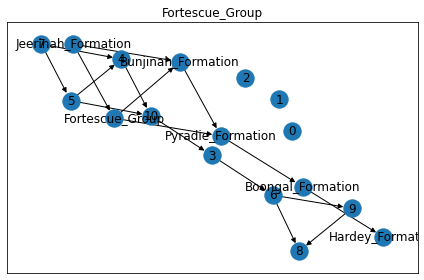

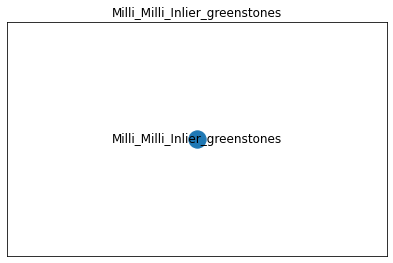

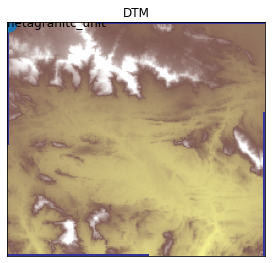

 50%|█████████▌         | 50/100 [00:03<00:03, 12.67it/s]

group choices: 1
dtb and dtb_null set to 0
16 orientations saved to ./model-test/output/orientations.csv
extra orientations saved as ./model-test/output//empty_series_orientations.csv
basal contacts saved allpts= 279 deci_pts= 87
saved as ./model-test/tmp/all_contacts.csv and ./model-test/tmp/contacts.csv
basal contacts without faults saved as ./model-test/tmp/basal_contacts.shp


 60%|███████████▍       | 60/100 [00:04<00:02, 13.49it/s]

decimated contacts saved as ./model-test/output/contacts4.csv
All observations n= 21
groups ['Fortescue Group' 'Milli Milli Inlier greenstones'
 'Milli Milli Inlier metagranitc unit'] 
codes ['Fortescue Group' 'Milli Milli Inlier greenstones'
 'Milli Milli Inlier metagranitc unit' 'Jeerinah Formation'
 'Hardey Formation' 'Boongal Formation' 'Bunjinah Formation'
 'Pyradie Formation']


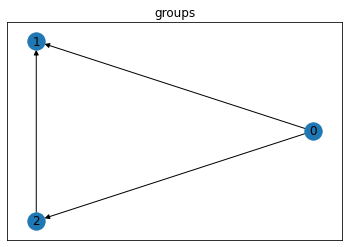

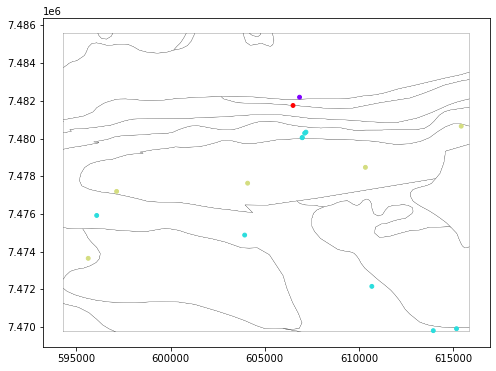

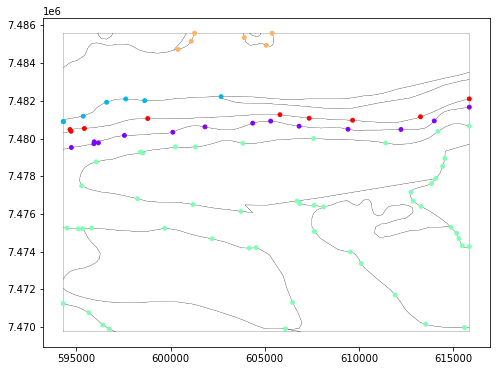

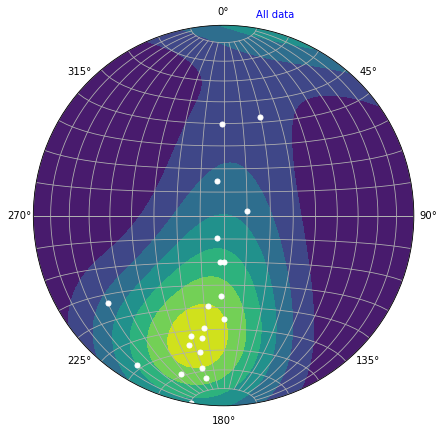

----------------------------------------------------------------------------------------------------------------------
Fortescue Group observations n= 13
strike/dip of girdle 10.780127235359828 / 89.28279950826362


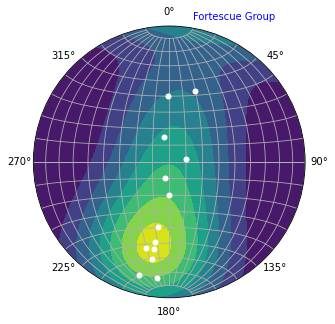

----------------------------------------------------------------------------------------------------------------------
Milli Milli Inlier greenstones observations n= 5
strike/dip of girdle 11.71495310836815 / 83.37120624243896


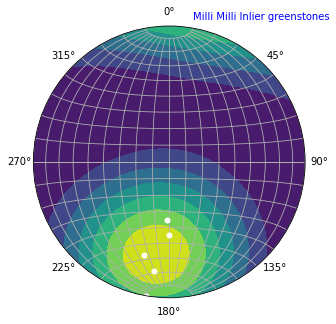

----------------------------------------------------------------------------------------------------------------------
Milli Milli Inlier metagranitc unit observations n= 3
strike/dip of girdle 43.33201705479644 / 80.12796662796401


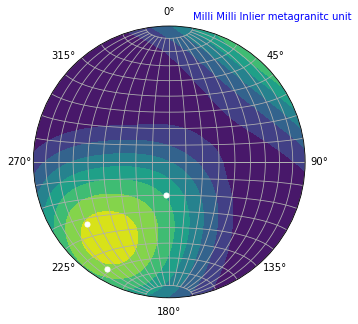

44 32
interpolated dips


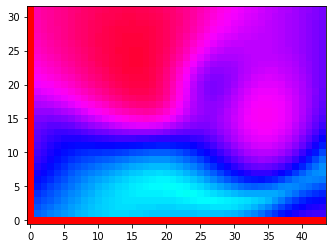

interpolated dip directions


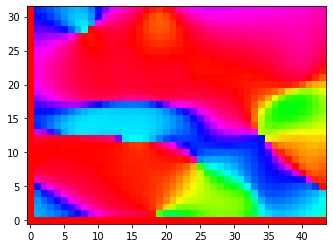

interpolated contacts


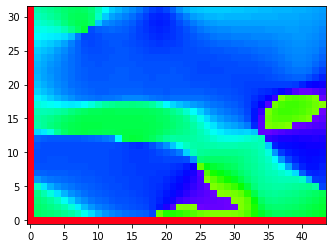

 70%|█████████████▎     | 70/100 [00:07<00:04,  6.92it/s]

fault orientations saved as ./model-test/output/fault_orientations.csv
fault positions saved as ./model-test/output/faults.csv
fault dimensions saved as ./model-test/output/fault_dimensions.csv


 90%|█████████████████  | 90/100 [00:10<00:01,  6.91it/s]

fault displacement estimates saved as ./model-test/output/fault_displacements3.csv
near-fault orientations saved as ./model-test/tmp/ex_f_combo_full.csv
near-fault orientations saved as ./model-test/tmp/ex_f_combo_full.csv
0 Fortescue_Group
1 Milli_Milli_Inlier_metagranitc_unit
2 Milli_Milli_Inlier_greenstones
pluton contacts and orientations saved as:
./model-test/output/ign_contacts.csv
./model-test/output/ign_orientations_domes.csv
Propagating dips along contacts...
15
54 points saved to ./model-test/tmp/raw_contacts.csv
25 thickness estimates saved as ./model-test/output/formation_thicknesses.csv
['Pyradie_Formation' 'Boongal_Formation' 'Hardey_Formation'] already processed
8 min thickness estimates appended to ./model-test/output/formation_thicknesses.csv
Pyradie_Formation 758.5 287.79245994292484
Boongal_Formation 459.5 200.6809518724795
Hardey_Formation 949.0 1145.7978409421498
Bunjinah_Formation 1146.0 104.64384039843593
Jeerinah_Formation 3647.0 624.6265284151804
fold axial tr

100%|██████████████████| 100/100 [00:12<00:00,  8.17it/s]

cycles []


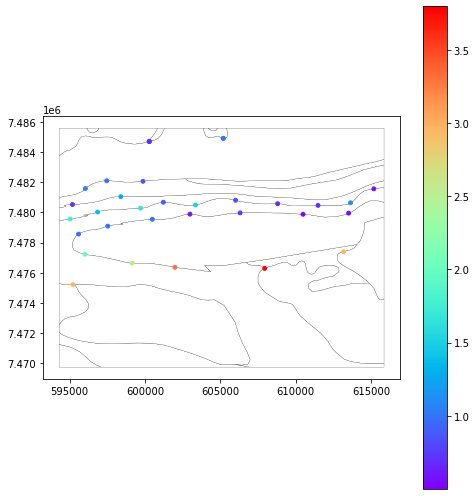

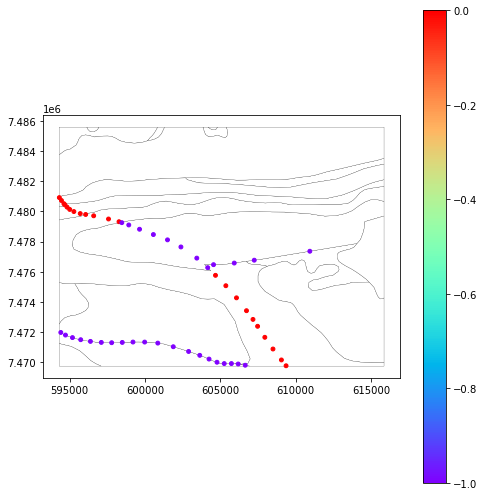

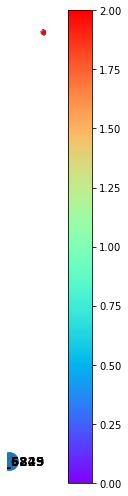

In [7]:
import os
from map2loop.project import Project
proj = Project(
                loopdata_state="WA"
                )

proj.update_config(
                    out_dir='./model-test',
                    overwrite='true',                    
                    bbox_3d={
                         "minx": mbbox.total_bounds[0], #500000,
                         "miny": mbbox.total_bounds[1], #7490000,
                         "maxx": mbbox.total_bounds[2], #545000,
                         "maxy": mbbox.total_bounds[3], #7520000,
                         "base": -3200,
                         "top": 1200,
                     },
                    proj_crs={'init': 'EPSG:28350'},
                    quiet=False
                  )
proj.run()

## Loop Structural

In [8]:
# Define project pathing from m2l
proj_path = proj.config.project_path
graph_path = proj.config.graph_path
tmp_path = proj.config.tmp_path
data_path = proj.config.data_path
dtm_path = proj.config.dtm_path
output_path = proj.config.output_path
vtk_path = proj.config.vtk_path

# Define project bounds
minx,miny,maxx,maxy = proj.config.bbox
model_base = proj.config.bbox_3d['base']
model_top = proj.config.bbox_3d['top']

fault_file = proj.config.fault_file_csv


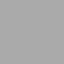

m2l 0.4342835505803426 LoopStructural 0.8496664643287659 Total 1.2839500149091085 minutes


In [9]:
import random
import os
import time
from datetime import datetime
import shutil
import logging
logging.getLogger().setLevel(logging.ERROR)

import numpy as np
from LoopStructural import GeologicalModel
import lavavu
from LoopStructural.visualisation import LavaVuModelViewer
from LoopStructural import GeologicalModel

nowtime=datetime.now().isoformat(timespec='minutes')   
model_name='leaflet'+'_'+nowtime.replace(":","-").replace("T","-")
if (os.path.exists(vtk_path+model_name)):
    shutil.rmtree(vtk_path+model_name)
os.mkdir(vtk_path+model_name)
filename=vtk_path+model_name+'/'+'surface_name_{}.vtk'


f=open(tmp_path+'bbox.csv','w')
f.write('minx,miny,maxx,maxy,lower,upper\n')
ostr='{},{},{},{},{},{}\n'.format(minx,miny,maxx,maxy,model_base,model_top)
f.write(ostr)
f.close()
t1 = time.time()
fault_params = {'interpolatortype':'FDI',
                'nelements':3e4,
                'data_region':.3,
                'solver':'pyamg',
#                 overprints:overprints,
                'cpw':10,
                'npw':10}
foliation_params = {'interpolatortype':'PLI' , # 'interpolatortype':'PLI',
                    'nelements':1e5,  # how many tetras/voxels
                    'buffer':0.8,  # how much to extend nterpolation around box
                    'solver':'pyamg',
                    'damp':True}

if(not os.path.exists(fault_file)):
    f=open(output_path + '/fault_displacements3.csv','w')
    f.write('X,Y,fname,apparent_displacement,vertical_displacement,downthrow_dir\n')
    f.close()
    f=open(output_path + '/fault_orientations.csv','w')
    f.write('X,Y,Z,DipDirection,dip,DipPolarity,formation\n')
    f.close()
    f=open(output_path + '/faults.csv','w')
    f.write('X,Y,Z,formation\n')
    f.close()
    f=open(output_path + '/fault-fault-relationships.csv','w')
    f.write('fault_id\n')
    f.close()
    f=open(output_path + '/group-fault-relationships.csv','w')
    f.write('group\n')
    f.close()

    model, m2l_data = GeologicalModel.from_map2loop_directory(proj_path,
                                                          skip_faults=True,
                                                          fault_params=fault_params,
                                                          foliation_params=foliation_params)
else:
    model, m2l_data = GeologicalModel.from_map2loop_directory(proj_path,
                                                          skip_faults=False,
                                                          fault_params=fault_params,
                                                          foliation_params=foliation_params)

view = LavaVuModelViewer(model,vertical_exaggeration=1) 
view.nsteps = np.array([200,200,200])
#view.set_zscale(2)
view.add_model(cmap='tab20')
view.nsteps=np.array([50,50,50])
#view.add_model_surfaces(filename=filename)
view.add_model_surfaces()
for sg in model.feature_name_index:
    if( 'super' in sg):
        view.add_data(model.features[model.feature_name_index[sg]])
view.interactive()  

t2 = time.time()
print("m2l",(t1-t0)/60.0,"LoopStructural",(t2-t1)/60.0,"Total",(t2-t0)/60.0,"minutes")